In [41]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 2.7 MB/s eta 0:00:006.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:005.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2

In [110]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 

import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFECV

import matplotlib.pyplot as plt

In [10]:
dmo = pd.read_csv("../data/dmo_reduced.csv", sep = ';')
dmo.shape

(1506, 29)

In [11]:
dmo.head()

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,flow_CA,TransactionsCred_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,0,51,7,1,0.0,0.0,1.0,0.0,0.0,1333.802857,0.000000,0.0,0.0,0.000000,0.000000,-16.921429,23.0,250.000000,283.089286,247.607143,30.0,3.0,9.0,1.0,0.0,0.0,26.972679,0.0,0.0
1,1,43,152,1,1.0,0.0,0.0,0.0,0.0,110.768571,13326.190357,0.0,0.0,0.000000,0.000000,318.492857,3.0,307.142857,38.407143,35.714286,6.0,2.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,1,24,153,1,1.0,0.0,0.0,1.0,0.0,1599.840714,76.437143,0.0,0.0,1110.381786,0.000000,-1776.360714,4.0,714.285714,526.037500,1963.165357,36.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,58,200,1,1.0,0.0,0.0,0.0,0.0,5353.483929,8079.715714,0.0,0.0,0.000000,0.000000,-1067.634643,14.0,157.142857,832.175000,1779.571429,41.0,4.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,24,19,1,0.0,0.0,0.0,0.0,1.0,4.297143,0.000000,0.0,0.0,0.000000,1982.071071,18.750714,2.0,357.142857,0.000000,0.000000,6.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Define features

In [12]:
soc_dem = ['Sex', 'Age', 'Tenure']

products_act_bal = ['Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA',
                       'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL']

inflow_outflow = ['flow_CA', 'TransactionsCred_CA', 'VolumeDebCash_Card', 
                  'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb_CA',
                  'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

sales = ['Sale_MF', 'Sale_CC', 'Sale_CL']
revenue = ['Revenue_MF', 'Revenue_CC', 'Revenue_CL']

### 1. Split dataset into training, test and validation sets

In [14]:
dmo_train = dmo[~dmo['Sale_MF'].isna()]
dmo_test = dmo[dmo['Sale_MF'].isna()]

#### 1.1 Explore training data

In [15]:
dmo_train[soc_dem + products_act_bal + inflow_outflow + sales + revenue].describe()

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,flow_CA,TransactionsCred_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,0.533702,45.358011,100.159116,1.078453,0.325967,0.898343,0.258564,0.111602,0.090608,2533.794455,3667.636088,3274.373238,38.460895,32.245206,315.892979,-15.221381,4.275138,268.016906,156.484730,737.899236,13.598895,1.973481,4.601105,0.201105,0.255249,0.285083,1.972902,2.854124,3.393204
std,0.503552,16.792988,65.223230,0.331646,0.582602,3.918789,0.438087,0.315051,0.320001,6404.119380,17565.864742,25476.494456,180.005275,157.737539,1524.262636,2750.073086,4.984322,890.831174,337.215152,3172.972062,12.998272,2.684222,5.238873,0.401048,0.436242,0.451704,10.207132,18.291659,7.590542
min,-1.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.479286,0.000000,-35604.112857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.548571,0.000000,0.000000,0.000000,0.000000,0.000000,-105.532143,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,43.000000,95.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,542.171429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,75.000000,26.000000,178.571429,10.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,59.000000,151.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2279.742857,0.481071,0.000000,0.000000,0.000000,0.000000,126.496786,4.000000,353.571429,180.327143,499.964286,19.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.214286,4.214286
max,1.000000,90.000000,271.000000,4.000000,3.000000,79.000000,1.000000,1.000000,2.000000,74934.956071,389883.830714,579084.107857,2055.325357,1767.785357,17300.489643,53935.488929,48.000000,23571.428571,3637.616786,61955.103929,83.000000,25.000000,34.000000,1.000000,1.000000,1.000000,220.488214,407.962500,133.275357


The statistics show the features have varying scales, some with a high standard deviation compared to their mean and some features with much higher numerical values compared to other features. Such differences can bias modelling algorithms and affect model performance. It is necessary to normalize problematic features, typically transaction/account amounts so that their final values follow a normal distribution.

In [90]:
features_to_normalize = ['flow_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
                         'VolumeDeb_PaymentOrder', 'ActBal_CA', 'ActBal_SA',
                         'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL']

min_max_scaler = preprocessing.MinMaxScaler()
dmo_train_norm = min_max_scaler.fit_transform(dmo_train[features_to_normalize])
dmo_train_norm = pd.DataFrame(dmo_train_norm, columns=features_to_normalize, 
                              index=dmo_train[features_to_normalize].index)
dmo_train_norm.head()

,flow_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
0,0.397446,0.010606,0.077823,0.003997,0.017799,0.000000,0.0,0.000000,0.00868,0.000000
1,0.401192,0.013030,0.010558,0.000576,0.001478,0.034180,0.0,0.000000,0.00868,0.000000
4,0.397845,0.015152,0.000000,0.000000,0.000057,0.000000,0.0,0.000000,0.00868,0.114567
6,0.397675,0.010758,0.001919,0.000000,0.000000,0.000000,0.0,0.159084,0.00868,0.000000
11,0.396935,0.014394,0.047677,0.005045,0.004722,0.000015,0.0,0.000000,0.00868,0.199896


In [91]:
dmo_train_norm = pd.concat((dmo_train.drop(columns = features_to_normalize),
                           dmo_train_norm), 
                           axis = 1)

dmo_train_norm.describe()

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,TransactionsCred_CA,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,flow_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,0.533702,45.358011,100.159116,1.078453,0.325967,0.898343,0.258564,0.111602,0.090608,4.275138,13.598895,1.973481,4.601105,0.201105,0.255249,0.285083,1.972902,2.854124,3.393204,0.397465,0.011370,0.043018,0.011910,0.033813,0.009407,0.005654,0.018713,0.026762,0.018259
std,0.503552,16.792988,65.223230,0.331646,0.582602,3.918789,0.438087,0.315051,0.320001,4.984322,12.998272,2.684222,5.238873,0.401048,0.436242,0.451704,10.207132,18.291659,7.590542,0.030713,0.037793,0.092702,0.051214,0.085462,0.045054,0.043994,0.087580,0.088454,0.088105
min,-1.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.396457,0.000000,0.000000,0.000000,0.000941,0.000000,0.000000,0.000000,0.008680,0.000000
50%,1.000000,43.000000,95.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,10.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.397635,0.003182,0.007148,0.002882,0.007235,0.000000,0.000000,0.000000,0.008680,0.000000
75%,1.000000,59.000000,151.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,19.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.214286,4.214286,0.399048,0.015000,0.049573,0.008070,0.030423,0.000001,0.000000,0.000000,0.008680,0.000000
max,1.000000,90.000000,271.000000,4.000000,3.000000,79.000000,1.000000,1.000000,2.000000,48.000000,83.000000,25.000000,34.000000,1.000000,1.000000,1.000000,220.488214,407.962500,133.275357,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
dmo_train_norm.shape

(905, 29)

### 2. Feature Selection

In [101]:
# Evaluate feature importances with RandomForest
all_features = soc_dem + products_act_bal + inflow_outflow

rfmf = RandomForestClassifier(n_estimators=500, random_state=50)
rfcc = RandomForestClassifier(n_estimators=500, random_state=50)
rfcl = RandomForestClassifier(n_estimators=500, random_state=50)

rfmf.fit(dmo_train_norm[all_features], dmo_train_norm[["Sale_MF"]].to_numpy().ravel())
rfcc.fit(dmo_train_norm[all_features], dmo_train_norm[["Sale_CC"]].to_numpy().ravel())
rfcl.fit(dmo_train_norm[all_features], dmo_train_norm[["Sale_CL"]].to_numpy().ravel())

mf_feature_importances = rfmf.feature_importances_
cc_feature_importances = rfcc.feature_importances_
cl_feature_importances = rfcl.feature_importances_

mf_indices = np.argsort(mf_feature_importances)
cc_indices = np.argsort(cc_feature_importances)
cl_indices = np.argsort(cl_feature_importances)

#### Feature importances for MF

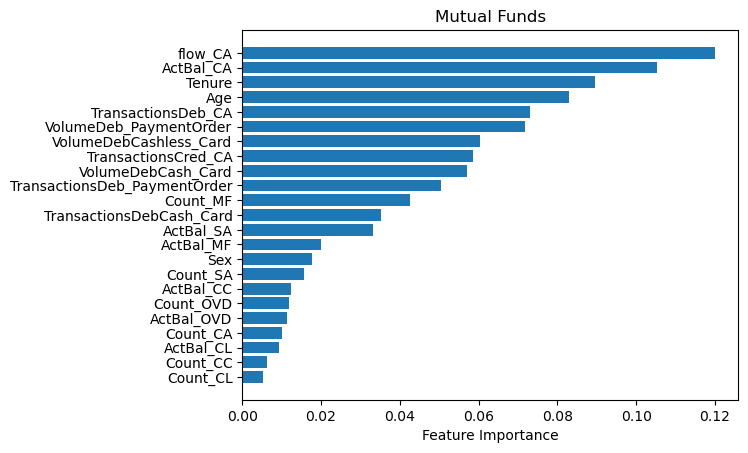

In [102]:
plt.title('Mutual Funds')
plt.barh(range(len(mf_indices)), mf_feature_importances[mf_indices], align='center')
plt.yticks(range(len(mf_indices)), [all_features[i] for i in mf_indices], rotation = 0)
plt.xlabel('Feature Importance')
plt.show()

Select the best set of MF features according to RFE with 5-fold Cross-Validation

In [111]:
rfe_mf = RFECV(rfmf, cv=5, scoring="neg_mean_squared_error")
rfe_mf.fit(dmo_train_norm[all_features], dmo_train_norm[["Sale_MF"]].to_numpy().ravel())

RFECV(cv=5, estimator=RandomForestClassifier(n_estimators=500, random_state=50),
      scoring='neg_mean_squared_error')

In [113]:
mf_selected_features = np.array(all_features)[rfe_mf.get_support()]
mf_selected_features

array(['Age', 'Tenure', 'Count_MF', 'ActBal_CA', 'ActBal_SA', 'flow_CA',
       'TransactionsCred_CA', 'VolumeDebCash_Card',
       'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder',
       'TransactionsDeb_CA', 'TransactionsDeb_PaymentOrder'], dtype='<U28')

#### Feature importances for CC

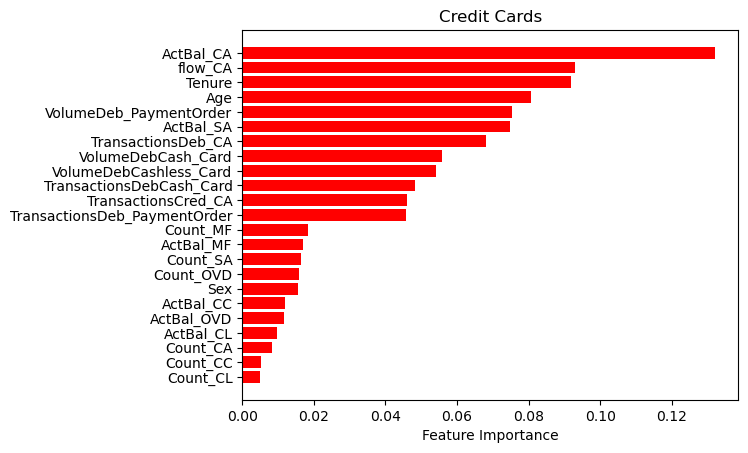

In [109]:
plt.title('Credit Cards')
plt.barh(range(len(cc_indices)), cc_feature_importances[cc_indices], color = "red", align='center')
plt.yticks(range(len(cc_indices)), [all_features[i] for i in cc_indices], rotation = 0)
plt.xlabel('Feature Importance')
plt.show()

Select the best set of CC features according to RFE with 5-fold Cross-Validation

In [114]:
rfe_cc = RFECV(rfcc, cv=5, scoring="neg_mean_squared_error")
rfe_cc.fit(dmo_train_norm[all_features], dmo_train_norm[["Sale_CC"]].to_numpy().ravel())

RFECV(cv=5, estimator=RandomForestClassifier(n_estimators=500, random_state=50),
      scoring='neg_mean_squared_error')

In [115]:
cc_selected_features = np.array(all_features)[rfe_cc.get_support()]
cc_selected_features

array(['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF',
       'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD',
       'ActBal_CC', 'ActBal_CL', 'flow_CA', 'TransactionsCred_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder'],
      dtype='<U28')

#### Feature importances for CL

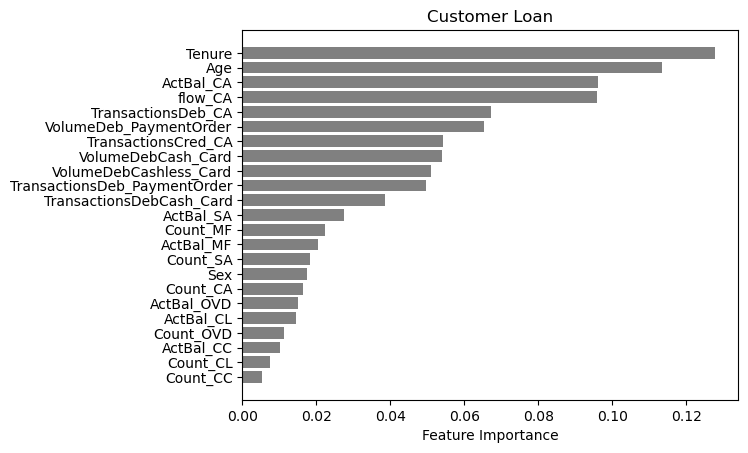

In [108]:
plt.title('Customer Loan')
plt.barh(range(len(cl_indices)), cl_feature_importances[cl_indices], color = "grey", align='center')
plt.yticks(range(len(cl_indices)), [all_features[i] for i in cl_indices], rotation = 0)
plt.xlabel('Feature Importance')
plt.show()

Select the best set of CL features according to RFE with 5-fold Cross-Validation

In [116]:
rfe_cl = RFECV(rfcl, cv=5, scoring="neg_mean_squared_error")
rfe_cl.fit(dmo_train_norm[all_features], dmo_train_norm[["Sale_CL"]].to_numpy().ravel())

RFECV(cv=5, estimator=RandomForestClassifier(n_estimators=500, random_state=50),
      scoring='neg_mean_squared_error')

In [117]:
cl_selected_features = np.array(all_features)[rfe_cl.get_support()]
cl_selected_features

array(['Age', 'Tenure', 'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'flow_CA',
       'TransactionsCred_CA', 'VolumeDebCash_Card',
       'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder',
       'TransactionsDeb_CA', 'TransactionsDebCash_Card',
       'TransactionsDeb_PaymentOrder'], dtype='<U28')

The RF feature selection procedure results in different features selected for predicting each target sale variable.

#### Training datasets for three propensity models

In [123]:
dmo_train_mf = dmo_train_norm[['Sale_MF'] + list(mf_selected_features)]
dmo_train_cc = dmo_train_norm[['Sale_CC'] + list(cc_selected_features)]
dmo_train_cl = dmo_train_norm[['Sale_CL'] + list(cl_selected_features)]

In [124]:
dmo_train_mf.head()

,Sale_MF,Age,Tenure,Count_MF,ActBal_CA,ActBal_SA,flow_CA,TransactionsCred_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb_CA,TransactionsDeb_PaymentOrder
0,1.0,51,7,0.0,0.017799,0.000000,0.397446,23.0,0.010606,0.077823,0.003997,30.0,9.0
1,0.0,43,152,0.0,0.001478,0.034180,0.401192,3.0,0.013030,0.010558,0.000576,6.0,1.0
4,0.0,24,19,0.0,0.000057,0.000000,0.397845,2.0,0.015152,0.000000,0.000000,6.0,0.0
6,0.0,64,30,0.0,0.000000,0.000000,0.397675,21.0,0.010758,0.001919,0.000000,24.0,0.0
11,0.0,66,132,0.0,0.004722,0.000015,0.396935,3.0,0.014394,0.047677,0.005045,39.0,10.0


### 3. Check if the data is balanced

In [128]:
dmo_train_mf.Sale_MF.value_counts()

0.0    723
1.0    182
Name: Sale_MF, dtype: int64

In [129]:
dmo_train_cc.Sale_CC.value_counts()

0.0    674
1.0    231
Name: Sale_CC, dtype: int64

In [131]:
dmo_train_cl.Sale_CL.value_counts()

0.0    647
1.0    258
Name: Sale_CL, dtype: int64

The data are highly imbalanced: there are more clients who did not buy products compared to those who did. Downsampling is used to deal with the problem

#### Downsampling

In [ ]:
# Subset only the customers who bought products
dmo_train_mf_boughtonly = dmo_train_mf.loc[dmo_train_mf['Sale_MF'] == 1]
dmo_train_cc_boughtonly = dmo_train_cc.loc[dmo_train_cc['Sale_CC'] == 1]
dmo_train_cl_boughtonly = dmo_train_cl.loc[dmo_train_cl['Sale_CL'] == 1]

# Sample the customers who did not buy products to be the same number as those who bought
dmo_train_mf_didntbuyonly = dmo_train_MF.loc[dmo_train_MF['Sale_MF'] == 0].sample(len(dmo_train_MF_boughtonly),
                                                                                  random_state=10)
dmo_train_cc_didntbuyonly = dmo_train_CC.loc[dmo_train_CC['Sale_CC'] == 0].sample(len(dmo_train_CC_boughtonly),
                                                                                  random_state=10)
dmo_train_cl_didntbuyonly = dmo_train_CL.loc[dmo_train_CL['Sale_CL'] == 0].sample(len(dmo_train_CL_boughtonly),
                                                                                  random_state=10)

# Concatenate the dataframes "boughtonly" and "didntbuyonly"
dmo_train_MF = pd.concat([dmo_train_MF_boughtonly, dmo_train_MF_didntbuyonly])
dmo_train_CC = pd.concat([dmo_train_CC_boughtonly, dmo_train_CC_didntbuyonly])
dmo_train_CL = pd.concat([dmo_train_CL_boughtonly, dmo_train_CL_didntbuyonly])